In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random

In [85]:
df=pd.read_csv('D:\Data_sets\Data.csv')
df

,Year_Of_Experience,Salary
0,2,15
1,3,28
2,5,42
3,13,64
4,8,50
5,16,90
6,11,58
7,1,8
8,9,54
9,7,48


Text(0, 0.5, 'Salary in 1000$')

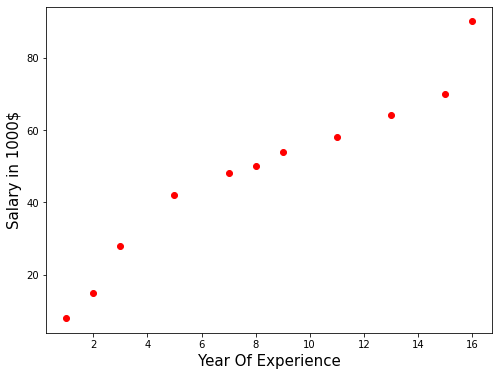

In [89]:
plt.figure(figsize = (8,6))
plt.scatter(df.Year_Of_Experience, df.Salary, color='r')
plt.xlabel("Year Of Experience",fontsize=15)
plt.ylabel("Salary in 1000$",fontsize=15)

In [90]:
year=df.loc[:,'Year_Of_Experience']
year=year.values

salary=df.loc[:,'Salary']
salary=salary.values

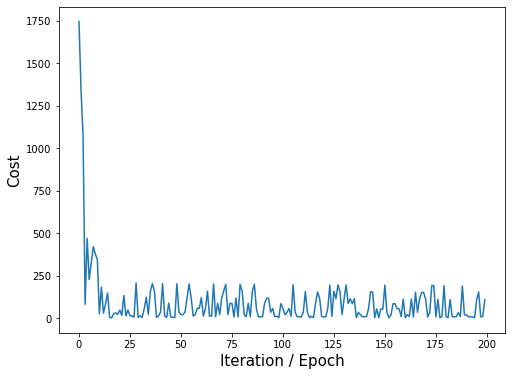

Weight: 5.352620952588177
Bias: 1.5650085633929118


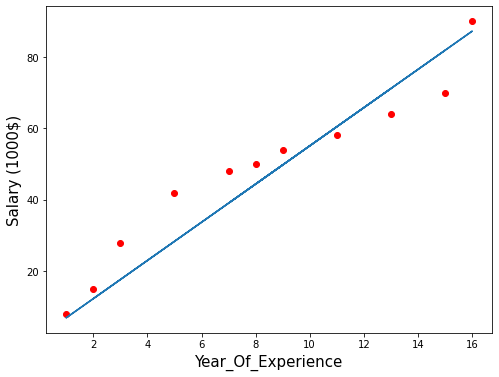

In [106]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

def mini_batch_gradient_descent(x, y, iterations,batch_size=2, learning_rate = 0.001):

    current_weight = 0
    current_bias = 0
    iterations = iterations
    learning_rate = learning_rate
    batch_size= batch_size
    
    n = len(x)
    costs = []
    weights = []
  

    for i in range(iterations):

        random_indices = np.random.permutation(x.size)
        x_random=x[random_indices]
        y_random=y[random_indices]
        
        
        for j in range(0,n,batch_size):
            x_batch=x_random[j:j+batch_size]
            y_batch=y_random[j:j+batch_size]
            
#             print(x_batch)
#             print(y_batch)
        

            y_predicted = (current_weight * x_batch) + current_bias

            current_cost = mean_squared_error(y_batch, y_predicted)

            previous_cost = current_cost

            # Calculating the gradients
            weight_gradient = -(2/n) * sum(x_batch * (y_batch-y_predicted))
            bias_gradient = -(2/n) * sum(y_batch-y_predicted)

            # Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_gradient)
            current_bias = current_bias - (learning_rate * bias_gradient)

        costs.append(current_cost)
        weights.append(current_weight)
        #print(f"Iteration {i+1}: Cost={current_cost}, Weight={current_weight}, Bias={current_bias}")


    plt.figure(figsize = (8,6))
    plt.plot(range(iterations), costs)
    plt.xlabel("Iteration / Epoch",fontsize=15)
    plt.ylabel("Cost",fontsize=15)
    plt.show()
    return current_weight, current_bias




weight, bias = mini_batch_gradient_descent(year, salary, iterations=200)
print(f"Weight: {weight}\nBias: {bias}")


plt.figure(figsize = (8,6))
plt.scatter(year, salary, marker='o', color='red')



regression_line= [(weight * x ) + bias for x in year]
plt.plot(year,regression_line)


plt.xlabel("Year_Of_Experience",fontsize=15)
plt.ylabel("Salary (1000$)",fontsize=15)
plt.show()


In [94]:
def predict(x,w,b):
    ans=w * x + b
    return ans

Spending_predicted = predict(11,weight,bias)
print(f'Salary = {round(Spending_predicted,2)} 1000$')

Salary = 59.52 1000$


### Using Random Data Set (Linear)

In [108]:
from sklearn.datasets import make_regression
X,Y=make_regression(n_samples=100,n_features=1, n_informative=1,noise=20,random_state=20)
X=X.flatten()

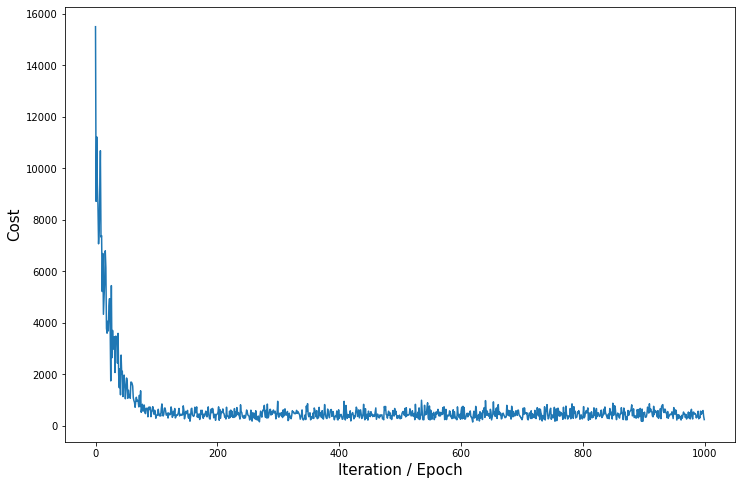

Weight: 96.23925241330207
Bias: 2.2927647505264344


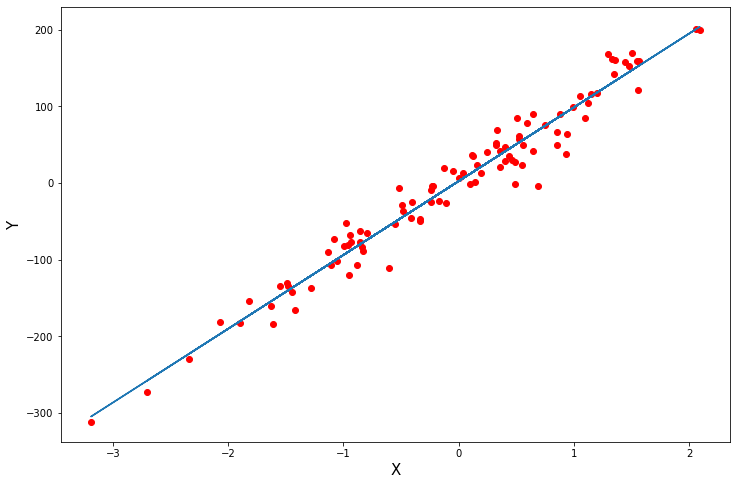

In [109]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

def mini_batch_gradient_descent(x, y, iterations,batch_size=20, learning_rate = 0.01):

    current_weight = 0
    current_bias = 0
    iterations = iterations
    learning_rate = learning_rate
    batch_size= batch_size
    
    n = len(x)
    costs = []
    weights = []
   

   
    for i in range(iterations):

        random_indices = np.random.permutation(x.size)
        x_random=x[random_indices]
        y_random=y[random_indices]
        
        
        for j in range(0,n,batch_size):
            x_batch=x_random[j:j+batch_size]
            y_batch=y_random[j:j+batch_size]
            
#             print(x_batch)
#             print(y_batch)
        

            y_predicted = (current_weight * x_batch) + current_bias

            current_cost = mean_squared_error(y_batch, y_predicted)

            previous_cost = current_cost

            # Calculating the gradients
            weight_gradient = -(2/n) * sum(x_batch * (y_batch-y_predicted))
            bias_gradient = -(2/n) * sum(y_batch-y_predicted)

            # Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_gradient)
            current_bias = current_bias - (learning_rate * bias_gradient)

        costs.append(current_cost)
        weights.append(current_weight)
        #print(f"Iteration {i+1}: Cost={current_cost}, Weight={current_weight}, Bias={current_bias}")


    plt.figure(figsize = (12,8))
    plt.plot(range(iterations), costs)
    plt.xlabel("Iteration / Epoch",fontsize=15)
    plt.ylabel("Cost",fontsize=15)
    plt.show()
    return current_weight, current_bias



weight, bias = mini_batch_gradient_descent(X, Y, iterations=1000)
print(f"Weight: {weight}\nBias: {bias}")


plt.figure(figsize = (12,8))
plt.scatter(X, Y, marker='o', color='red')



reg_line= [(weight * x ) + bias for x in X]
plt.plot(X,reg_line)


plt.xlabel("X",fontsize=15)
plt.ylabel("Y",fontsize=15)
plt.show()
